In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from pylab import rcParams
from scipy.stats import t
import math
from scipy.stats import permutation_test
import random
rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'
np.random.seed(42)
from tqdm import tqdm

## 1

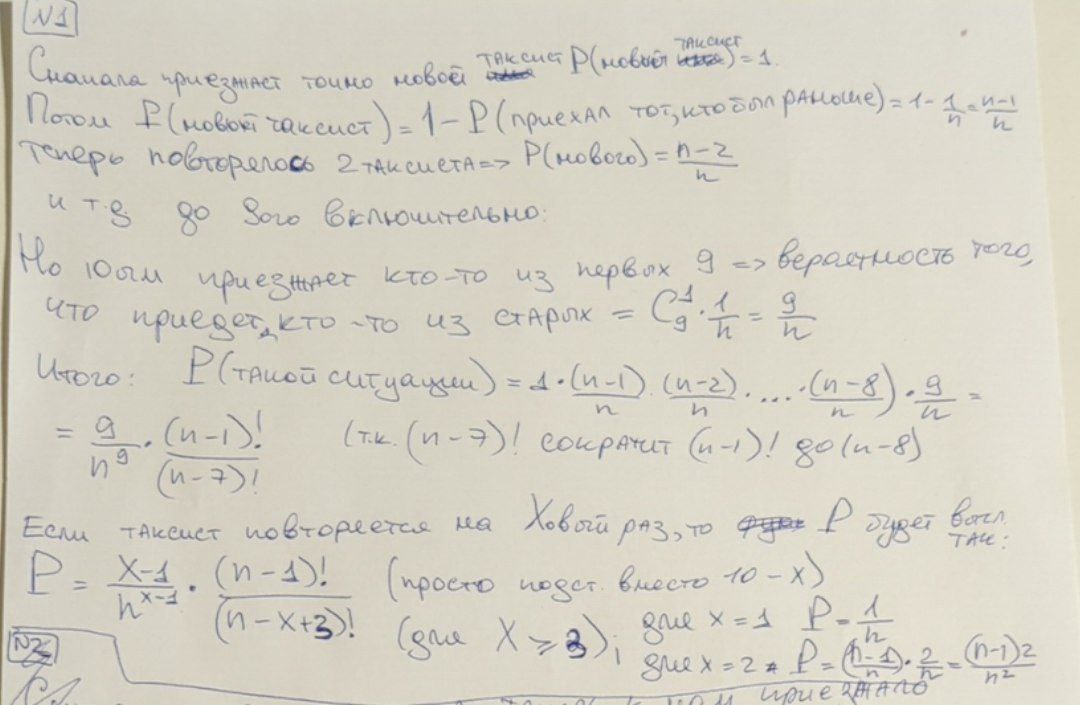

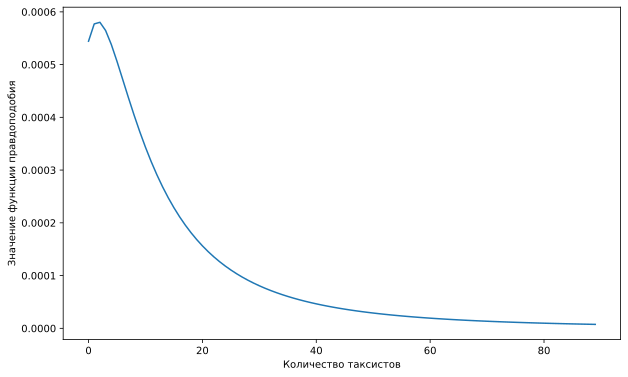

In [3]:
Lhood = []
for i in range(10, 100):
  Lhood.append((9 / i ** 9) * (i - 1) * (i - 2) * (i - 3) * (i - 4) * (i - 5) * (i - 6))

plt.plot(Lhood)
plt.xlabel('Количество таксистов')
plt.ylabel('Значение функции правдоподобия')
plt.show()

In [4]:
print('Значение функии правдоподобия максимально в:', Lhood.index(max(Lhood)) + 10)

Значение функии правдоподобия максимально в: 12


Text(0, 0.5, 'Матожидание повторного приезда')

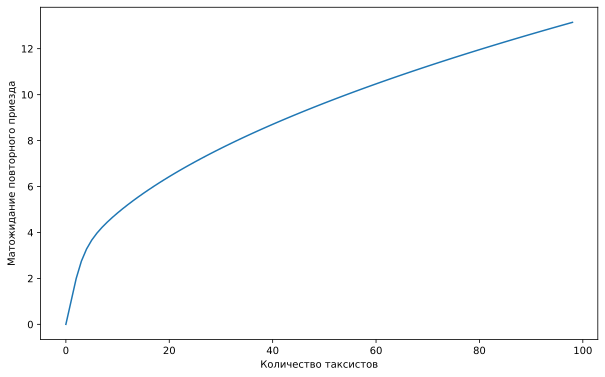

In [7]:
import math
E = 0
EV = []

for i in range(1, 100):
  E = 0
  
  for j in range(1, i + 1):
    E += (math.factorial(i-1) / math.factorial(i - j + 1)) * (j-1) / (i ** (j-1)) * j
  EV.append(E)

plt.plot(EV)
plt.xlabel('Количество таксистов')
plt.ylabel('Матожидание повторного приезда')

## 3

0.96 <  1.38 < 1.81, значит 95% доверительный интервал накрывает мат.ожидание. Так как p_value = 0.014, то 95% доверительный интервал накрывает истинное мат.ожидание с вероятностью 98.6 %


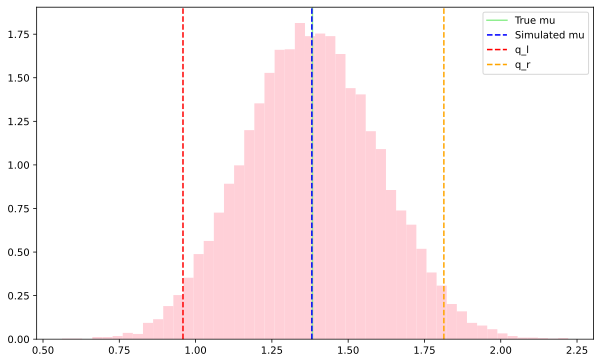

In [ ]:
a = 0
mu_all=[]
exp_rv = sts.expon.rvs(scale=1 , size=20)
mu = exp_rv.mean()

for j in range(10000):
  exp_i = np.random.choice(exp_rv, size=20, replace=True)
  mu_i = exp_i.mean()
  mu_all.append(mu_i)
new_mu_all=np.sort(mu_all)
q_l = new_mu_all[:int(round(len(new_mu_all)*0.025, 0))][-1]
q_r = new_mu_all[int(round(len(new_mu_all)*0.975, 0)):][0]
if (q_l <= mu) and (mu <= q_r):
  p_value = (5000 - (mu_all > mu).sum()) / 5000
  print(f"{round(q_l, 2)} <  {round(mu, 2)} < {round(q_r, 2)}, значит 95% доверительный интервал накрывает мат.ожидание. Так как p_value = {round(p_value, 3)}, то 95% доверительный интервал накрывает истинное мат.ожидание с вероятностью {100*round(1 - p_value, 3)} %")

plt.hist(mu_all, 50, density=True, facecolor='pink', alpha=0.75)
plt.axvline(x=mu, color='lightgreen', label='True mu')
plt.axvline(x = np.mean(mu_all),linestyle='--', color='blue', label='Simulated mu')
plt.axvline(q_l, color='r', linestyle='--', label='q_l')
plt.axvline(q_r, color='orange', linestyle='--', label='q_r')
plt.legend()
plt.show()


In [ ]:
b = 0
for i in range(10000):
  exp_rv = sts.expon.rvs(scale=1 , size=20)
  mu = exp_rv.mean()
  vr = exp_rv.var()
  if (1 >= (mu - 2.09*((vr/20)**0.5))) and (1 <= (mu + 2.09*((vr/20)**0.5))):
    b += 1
print(b/10000)


0.9117


In [ ]:
c = 0
exp_rv = sts.expon.rvs(scale=1 , size=20)
mu = exp_rv.mean()
vr = exp_rv.var()

for j in range(10000):
    exp_i = np.random.choice(exp_rv, size=20, replace=True)
    mu_i = exp_i.mean()
    q_l = mu_i - 2.09*((vr / 20)**0.5)
    q_r = mu_i + 2.09*((vr / 20)**0.5)
    if (mu >= q_l) and (mu <= q_r):
      c += 1
  #plt.axvline(1, color='g', linestyle='--', label='True Value')
  #plt.axvline(q_l, color='r', linestyle='--', label='True Value')
  #plt.axvline(q_r, color='r', linestyle='--', label='True Value')
  #plt.hist (mu_all, 100, density=True, facecolor='b', alpha=0.75)

print(c / 10000)


0.9637


In [ ]:
print("Ассимптотический доверительный интервал попадает с вероятностью", round(b / 10000, 3)) 
print("Наивный бутстрэп попадает с вероятностью", round(1 - p_value, 3) ) 
print("Бутстрэп t-статистики попадает с вероятностью", round(c / 10000, 3)) 
print("Cамый топовый тот, у кого попадание в больше")

Ассимптотический доверительный интервал попадает с вероятностью 0.912
Наивный бутстрэп попадает с вероятностью 0.986
Бутстрэп t-статистики попадает с вероятностью 0.964
Cамый топовый тот, у кого попадание в больше


__№3.2__



In [ ]:
d = 0
for i in range(10000):
  t_rv = sts.t.rvs(df=3 , size=20)
  mu = t_rv.mean()
  vr = t_rv.var()
  if (0 >= mu - 2.09*((vr/20)**0.5)) and (0 <= mu + 2.09*((vr/20)**0.5)):
    d += 1
print(d/10000)


0.9553


-1.11 <  -0.38 < 0.36, значит 95% доверительный интервал накрывает мат.ожидание. Так как p_value = 0.021, то 95% доверительный интервал накрывает истинное мат.ожидание с вероятностью 0.979 %


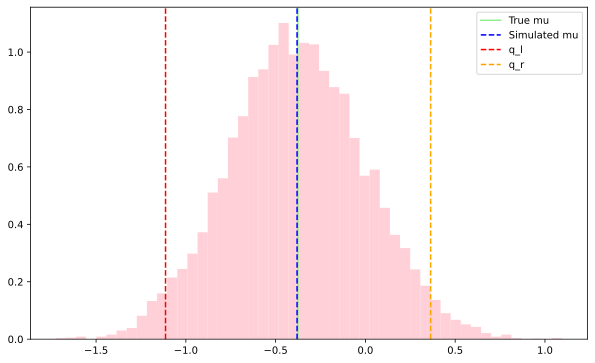

In [ ]:
e = 0
mu_all_t=[]
t_rv = sts.t.rvs(df=3 , size=20)
mu_t = t_rv.mean()

for j in range(10000):
  t_i = np.random.choice(t_rv, size=20, replace=True)
  mu_t_i = t_i.mean()
  mu_all_t.append(mu_t_i)
new_mu_all_t=np.sort(mu_all_t)
q_l_t = new_mu_all_t[:int(round(len(new_mu_all_t)*0.025, 0))][-1]
q_r_t = new_mu_all_t[int(round(len(new_mu_all_t)*0.975, 0)):][0]
if (q_l_t <= mu_t) and (mu_t <= q_r_t):
  p_value_t = abs((5000 - (mu_all_t < mu_t).sum()) / 5000)
  print(f"{round(q_l_t, 2)} <  {round(mu_t, 2)} < {round(q_r_t, 2)}, значит 95% доверительный интервал накрывает мат.ожидание. Так как p_value = {round(p_value_t, 3)}, то 95% доверительный интервал накрывает истинное мат.ожидание с вероятностью {round(1 - p_value_t, 3)} %")

plt.hist(mu_all_t, 50, density=True, facecolor='pink', alpha=0.75)
plt.axvline(x=mu_t, color='lightgreen', label='True mu')
plt.axvline(x = np.mean(mu_all_t),linestyle='--', color='blue', label='Simulated mu')
plt.axvline(q_l_t, color='r', linestyle='--', label='q_l')
plt.axvline(q_r_t, color='orange', linestyle='--', label='q_r')
plt.legend()
plt.show()



In [ ]:
f = 0
t_rv = sts.t.rvs(df=3 , size=20)
mu = t_rv.mean()
vr = t_rv.var()

for j in range(10000):
    t_i = np.random.choice(t_rv, size=20, replace=True)
    mu_i = t_i.mean()
    q_l = mu_i - 2.09*((vr / 20)**0.5)
    q_r = mu_i + 2.09*((vr / 20)**0.5)
    if (mu >= q_l) and (mu <= q_r):
      f += 1
print(f / 10000)

0.9627


In [ ]:
print("Ассимптотический доверительный интервал попадает с вероятностью", round(d / 10000, 3)) 
print("Наивный бутстрэп попадает с вероятностью", round(1 - p_value_t, 3) ) 
print("Бутстрэп t-статистики попадает с вероятностью", round(f / 10000, 3)) 
print("Cамый топовый тот, у кого попадание больше")

Ассимптотический доверительный интервал попадает с вероятностью 0.955
Наивный бутстрэп попадает с вероятностью 0.979
Бутстрэп t-статистики попадает с вероятностью 0.963
Cамый топовый тот, у кого попадание больше


__Наивный бутстрэп определенно лидер! Отлично попадает! Ему не важны ни распределения, ни количество наблюдений в выборке, всегда оч топово себя показывает__



__№4__



In [ ]:
#Тест Уэлча
n_x = 253
n_y = 43
df_x = pd.read_csv('/content/all_x.csv', sep='\t')
df_y = pd.read_csv('/content/all_y.csv', sep='\t')
mu_x = df_x['score'].mean()
mu_y = df_y['score'].mean()
var_x = df_x['score'].var()
var_y = df_y['score'].var()
var_est = ((var_x * (n_x - 1)) + (var_y * (n_y - 1))) / (n_x + n_y - 2)

d_est = (((var_x / n_x) + (var_y / n_y))**2) / ((var_x**2) / ((n_x**2) * (n_x - 1)) + (var_y**2) / ((n_y**2) * (n_y - 1)))
cv = t.ppf(0.95, math.ceil(d_est))
fv = (mu_x - mu_y) / ((var_est ** (0.5)) * (( 1 / n_x + 1 / n_y)**(0.5)))
print(round(cv, 3), "примерно равно", round(fv, 3), 'относительно баллов по 30-бальной шкале, значит, Н0 не отвергается')

1.673 примерно равно 0.914 относительно баллов по 30-бальной шкале, значит, Н0 не отвергается


In [ ]:
#Наивный бутстрэп
n_x = 253
n_y = 43
mu_all_xy = []
df_x = pd.read_csv('/content/all_x.csv', sep='\t')
df_y = pd.read_csv('/content/all_y.csv', sep='\t')
mu_x = df_x['score'].mean()
mu_y = df_y['score'].mean()
var_x = df_x['score'].var()
var_y = df_y['score'].var()
for i in range(10000):
    x_i = np.random.choice(df_x['score'], 253, replace=True)
    mu_xi = x_i.mean()
    y_i = np.random.choice(df_y['score'], 43, replace=True)
    mu_yi = y_i.mean()
    mu_all_xy.append(mu_xi - mu_yi)
new_mu_all_xy=np.sort(mu_all_xy)
q_l_xy = new_mu_all_xy[:int(round(len(new_mu_all_xy)*0.025, 0))][-1]
q_r_xy = new_mu_all_xy[int(round(len(new_mu_all_xy)*0.975, 0)):][0]
if (q_l_xy <= (mu_x - mu_y)) and ((mu_x - mu_y) <= q_r_xy):
  p_val_xy = abs((5000 - (mu_all_xy < (mu_x - mu_y)).sum()) / 5000)
print(f"{round(q_l_xy, 2)} <  {round(mu_x - mu_y, 2)} < {round(q_r_xy, 2)}")
print(f"Значит 95% доверительный интервал накрывает мат.ожидание. Так как p_value = {round(p_val_xy, 3)} < {0.05}, то Н0 не отвергается")



-1.06 <  0.89 < 2.89
Значит 95% доверительный интервал накрывает мат.ожидание. Так как p_value = 0.004 < 0.05, то Н0 не отвергается


In [ ]:
#Бутстрэп t-статистики
g = 0
n_x = 253
n_y = 43
mu_all_3 = []
df_x = pd.read_csv('/content/all_x.csv', sep='\t')
df_y = pd.read_csv('/content/all_y.csv', sep='\t')
mu_x = df_x['score'].mean()
mu_y = df_y['score'].mean()
mu_xy = mu_x - mu_y
var_x = df_x['score'].var()
var_y = df_y['score'].var()
for i in range(10000):
    x_i3 = np.random.choice(df_x['score'], 253, replace=True)
    mu_xi3 = x_i3.mean()
    y_i3 = np.random.choice(df_y['score'], 43, replace=True)
    mu_yi3 = y_i3.mean()
    var_xyi3 = ((x_i3.var() * 252) + (y_i3.var() * 42)) / (253 + 43 - 2)
    q_l_3 = mu_xi3 - mu_yi3 - 2.09*((var_xyi3 * (1 / 253 + 1 / 43))**0.5)
    q_r_3 = mu_i + 2.09*((var_xyi3 * (1 / 253 + 1 / 43))**0.5)
    if (mu_xy >= q_l_3) and (mu_xy <= q_r_3):
      g += 1
print("Разница мат.ожиданий попадает в доверительный интервал с вероятностью", g / 100, "%")
print("Полученное значение больше 95%, а значит наша разница мат.ожиданий попадает в 95% доверительный интервал")
print("Так как разница мат.ожиданий попадает в доверительный интервал, то гипотеза H0 не отвергается")


Разница мат.ожиданий попадает в доверительный интервал с вероятностью 97.41 %
Полученное значение больше 95%, а значит наша разница мат.ожиданий попадает в 95% доверительный интервал
Так как разница мат.ожиданий попадает в доверительный интервал, то гипотеза H0 не отвергается


In [ ]:
#Перестановочный тест
#H0 - связи нет
df_x = pd.read_csv('/content/all_x.csv', sep='\t')
df_y = pd.read_csv('/content/all_y.csv', sep='\t')
x = df_x['score']
y = df_y['score']
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)
rng = np.random.default_rng()
res = permutation_test((x, y), statistic, n_resamples=10000, vectorized=True, alternative='less', random_state=rng )
print("P_value = ", round(res.pvalue, 3), "> 0.05, значит, Н0 отвеграется, значит взаимосвязь есть")



P_value =  0.818 > 0.05, значит, Н0 отвеграется, значит взаимосвязь есть


__№5__


In [ ]:
#Составление таблицы сопряженности:
df_x["is x"] = 1
df_y["is x"] = 0
all = pd.concat([df_x, df_y], ignore_index=True)

med = all['score'].median()

all['happy'] = all['score'] > med

table = pd.crosstab(all['happy'], all['is x'])
print(table)

is x    0    1
happy         
False  23  130
True   20  123


In [ ]:
from scipy.stats import norm
from scipy.stats import chi2_contingency, contingency

#Смотрим на отношение шансов, потом считаем оценку логарифма отношения шансов и стандартного отклонения, потом ассимптотический интервал и проверяем гипотезу о равенстве
chance_r = (table.loc[True, 1] * table.loc[False, 0]) / (table.loc[False, 1] * table.loc[True, 0])

log_chance_r = np.log(chance_r)
se_log_chance_r = np.sqrt((1 / table.loc[True, 1]) + (1 / table.loc[False, 1]) + (1 / table.loc[True, 0]) + (1 / table.loc[False, 0]))

t = 2.09 
q_l_new = np.exp(log_chance_r - t * se_log_chance_r)
q_r_new = np.exp(log_chance_r + t * se_log_chance_r)

H0 = 1
t_stat = 1 - (log_chance_r - np.log(H0)) / se_log_chance_r
p_value = 2 * (1 - norm.cdf(t_stat))

print(round(q_l_new, 3), "<", round(t_stat, 3), '<', round(q_r_new, 3), " поэтому фактическое значение не попадает в доверительный интервал, значит Н0 не отвергается")
print(f'Кроме того, p_value = {round(p_value, 3)} < 0.05, что подтверждает то, что Н0 не отвергается')


0.545 < 0.745 < 2.171  поэтому фактическое значение не попадает в доверительный интервал, значит Н0 не отвергается
Кроме того, p_value = 0.456 < 0.05, что подтверждает то, что Н0 не отвергается


In [ ]:

#Смотрим на отношение вероятностей, потом считаем оценку логарифма отношения вероятностей и стандартного отклонения, потом ассимптотический интервал и проверяем гипотезу о равенстве
prob_r = (table.loc[True, 1]/(table.loc[False, 1] + table.loc[True, 1])) / (table.loc[True, 0]/(table.loc[False, 0] + table.loc[True, 0]))
log_prob_r = np.log(prob_r)
se_log_prob_r = (table.loc[False, 0]/(table.loc[True, 0]*(table.loc[True, 0] +table.loc[False, 0])) + table.loc[False, 1]/(table.loc[True, 1]*(table.loc[True, 1] +table.loc[False, 1])))**(0.5) 

t = 2.09
q_l_pr = np.exp(log_prob_r - se_log_prob_r * t)
q_r_pr = np.exp(log_prob_r + se_log_prob_r * t)

H0 = 1
t_stat = 1 - (log_prob_r- np.log(H0)) / se_log_prob_r
p_v_pr = 2 * (1 - norm.cdf(abs(t_stat)))

print(round(q_l_pr, 3), "<" , round(t_stat, 3), "<", round(q_r_pr, 3), "фактическое значение попадает в доверительный интервал, а значит Н0 не отвергается")
print(round(p_v_pr, 3), "< 0.05, что подтвержадет, что Н0 не отвергается")


0.724 < 0.748 < 1.51 фактическое значение попадает в доверительный интервал, а значит Н0 не отвергается
0.454 < 0.05, что подтвержадет, что Н0 не отвергается


In [ ]:
#Бутстрапим выборки, вычисляем шансы, строим интервал, ищем отношение шансов и проверяем гипотезу о шансах
np.random.seed(42)

boot_r = np.array([])
for _ in range(10000):
    boot_s = all[["is x", "happy"]].sample(frac=1, replace=True)
    boot_table = pd.crosstab(boot_s['happy'], boot_s['is x'])
    rr = (boot_table.loc[True, 1] * boot_table.loc[False, 0]) / (boot_table.loc[False, 1] * boot_table.loc[True, 0])
    boot_r = np.append(boot_r, rr)

q_l_b = np.percentile(boot_r, 2.5)
q_r_b = np.percentile(boot_r, 97.5)

rr = (table.loc[True, 1] * table.loc[False, 0]) / (table.loc[False, 1] * table.loc[True, 0])

H0 = 1
print(q_l_b, '<', H0, "<", q_r_b)
p_value = 1 - np.mean(np.abs(boot_r - H0) >= np.abs(rr - H0))
print(f"P_value = {p_value}, меньше 0.05, значит, Н0 не отвергается")


0.5619354838709677 < 1 < 2.1549539170506913
P_value = 0.19799999999999995, меньше 0.05, значит, Н0 не отвергается


## №7

Сначала два простеньких примера как ЧАТГПТ смог)

Это задачки из листка по теорверу и какой-то контрольной прошлых лет:

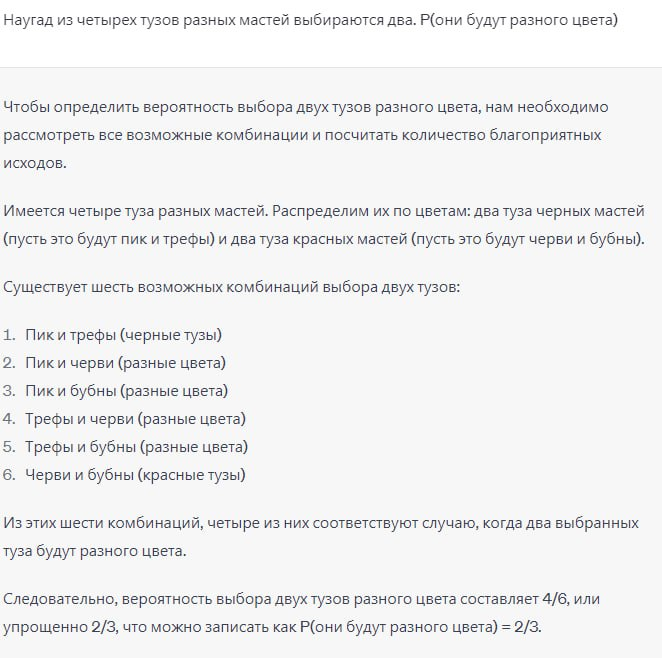

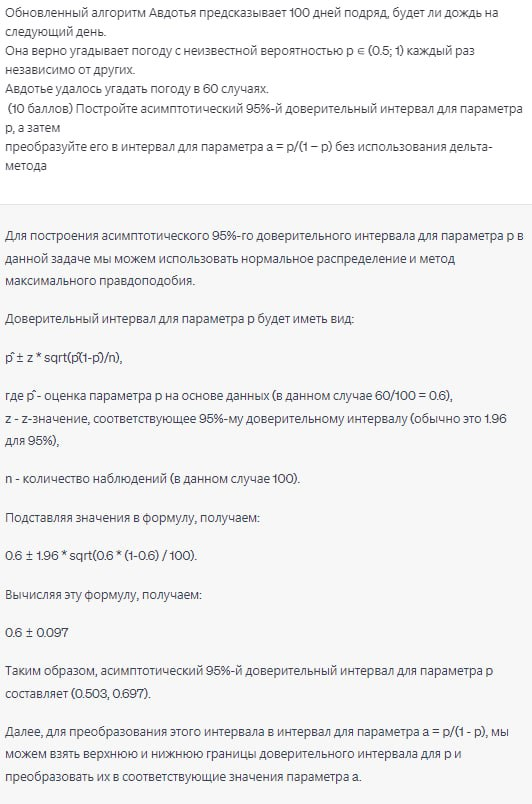

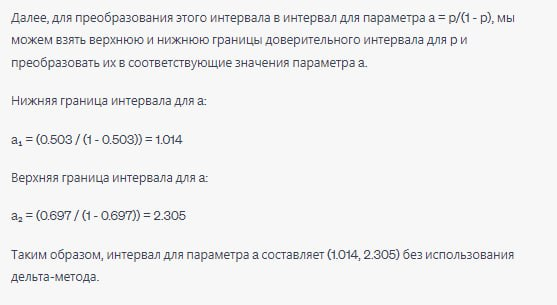

Ну а пример когда чатгпт не смог - это последний пункт первой задачи. И я сдалась его делать:(

## №8

Слушала по вечерам лекции Фила, он очень хорошо рассказывает, иногда дает больше практических аспектов, чем есть у нас на курсе. Вот его плейлист со свежего курсам матстата для онлайн-маги ФКН https://youtube.com/playlist?list=PLNKXA-74YGLjDOtDSZEFoy1yP-3AfiHUC